# Importing libraries

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import mean_squared_error

# Get all battery data in one DataFrame

In [2]:
battery_metricsList = ['Power.BatteryState','Power.BatteryVoltHR','Power.PercentageRemaining','Power.TimeRemaining']

In [3]:
for i in range(0,len(battery_metricsList)):
    print(battery_metricsList[i])
    metricID = battery_metricsList[i]
    df = pd.read_csv('C:/Users/JeffG/Desktop/Case 1 - data/battery_data_2/'+metricID+'_merged.csv',usecols=['time','value'])
    
    if(i==0):
        # Select timestamp and value from results
        data = df[['time','value']]
        # Convert object to float (BatteryVoltHR is an object for example)
        data["value"] = pd.to_numeric(data.value, errors='coerce')
        # Rename the column
        data.rename(columns={'value': metricID}, inplace=True)
        # Calculate average for time bin and replace NaN with interpolation
        data['time'] = pd.to_datetime(data.time, unit='ms')
        data = data.resample(rule='5Min', on='time').mean().interpolate()
        print(len(data))
    else:
        data2 = df[['time','value']]
        # Convert object to float (BatteryVoltHR is an object for example)
        data2["value"] = pd.to_numeric(data2.value, errors='coerce')
        # Rename the column
        data2.rename(columns={'value':metricID}, inplace=True)
        # Calculate average for time bin and replace NaN with interpolation
        data2['time'] = pd.to_datetime(data2.time, unit='ms')
        data2 = data2.resample(rule='5Min', on='time').mean().interpolate()
        data = pd.merge(data, data2, on='time')
        print(len(data))
        
battery_data = data

Power.BatteryState
52011
Power.BatteryVoltHR
52011
Power.PercentageRemaining
52011
Power.TimeRemaining
52011


In [4]:
battery_data.head()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining
time,,,,
2018-08-31 09:45:00,0.0,16.35,98.0,57375.000000
2018-08-31 09:50:00,0.0,16.35,98.0,57374.819277
2018-08-31 09:55:00,0.0,16.35,98.0,57374.638554
2018-08-31 10:00:00,0.0,16.35,98.0,57374.457831
2018-08-31 10:05:00,0.0,16.35,98.0,57374.277108


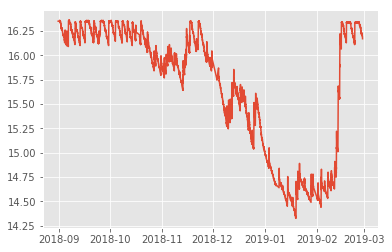

In [5]:
plt.plot(data['Power.BatteryVoltHR'])

# Get all weather data in one data frame

In [6]:
weather_metricsList = ['environment.light','environment.temperature','weather.uv','environment.relativehumidity',
              'weather.pressure', 'weather.rainrate', 'weather.windspeed']

In [7]:
for i in range(0,len(weather_metricsList)):
    print(weather_metricsList[i])
    metricID = weather_metricsList[i]
    df = pd.read_csv('C:/Users/JeffG/Desktop/Case 1 - data/weather_data/'+metricID+'_merged.csv',usecols=['time','value'])
    
    if(i==0):
        # Select timestamp and value from results
        data = df[['time','value']]
        # Convert object to float (BatteryVoltHR is an object for example)
        data["value"] = pd.to_numeric(data.value, errors='coerce')
        # Rename the column
        data.rename(columns={'value': metricID}, inplace=True)
        # Calculate average for time bin and replace NaN with interpolation
        data['time'] = pd.to_datetime(data.time, unit='ms')
        data = data.resample(rule='5Min', on='time').mean().interpolate()
        print(len(data))
    else:
        data2 = df[['time','value']]
        # Convert object to float (BatteryVoltHR is an object for example)
        data2["value"] = pd.to_numeric(data2.value, errors='coerce')
        # Rename the column
        data2.rename(columns={'value':metricID}, inplace=True)
        # Calculate average for time bin and replace NaN with interpolation
        data2['time'] = pd.to_datetime(data2.time, unit='ms')
        data2 = data2.resample(rule='5Min', on='time').mean().interpolate()
        data = pd.merge(data, data2, on='time')
        print(len(data))
        
weather_data = data

environment.light
52011
environment.temperature
52011
weather.uv
52011
environment.relativehumidity
52011
weather.pressure
52011
weather.rainrate
52011
weather.windspeed
52011


In [8]:
weather_data.head()

,environment.light,environment.temperature,weather.uv,environment.relativehumidity,weather.pressure,weather.rainrate,weather.windspeed
time,,,,,,,
2018-08-31 09:45:00,95338.168421,17.716316,2.007368,57.000000,1024.409158,0.0,2.033684
2018-08-31 09:50:00,95245.765697,17.716189,2.004979,57.019048,1024.403599,0.0,2.032264
2018-08-31 09:55:00,95153.362974,17.716063,2.002589,57.038095,1024.398041,0.0,2.030845
2018-08-31 10:00:00,95060.960250,17.715936,2.000199,57.057143,1024.392482,0.0,2.029425
2018-08-31 10:05:00,94968.557527,17.715810,1.997810,57.076190,1024.386924,0.0,2.028005


In [9]:
data = pd.merge(battery_data, weather_data, on='time')
#data.to_csv(r'C:\Users\JeffG\Desktop\Case 1 - data\all_data.csv')
data.head()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining,environment.light,environment.temperature,weather.uv,environment.relativehumidity,weather.pressure,weather.rainrate,weather.windspeed
time,,,,,,,,,,,
2018-08-31 09:45:00,0.0,16.35,98.0,57375.000000,95338.168421,17.716316,2.007368,57.000000,1024.409158,0.0,2.033684
2018-08-31 09:50:00,0.0,16.35,98.0,57374.819277,95245.765697,17.716189,2.004979,57.019048,1024.403599,0.0,2.032264
2018-08-31 09:55:00,0.0,16.35,98.0,57374.638554,95153.362974,17.716063,2.002589,57.038095,1024.398041,0.0,2.030845
2018-08-31 10:00:00,0.0,16.35,98.0,57374.457831,95060.960250,17.715936,2.000199,57.057143,1024.392482,0.0,2.029425
2018-08-31 10:05:00,0.0,16.35,98.0,57374.277108,94968.557527,17.715810,1.997810,57.076190,1024.386924,0.0,2.028005


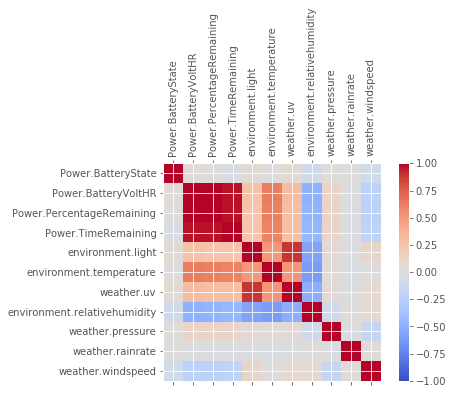

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
fig.savefig(r'C:\Users\JeffG\Dropbox\ICT-Elektronica\Thesis\Case 1 - failing battery pack\Images\correlation.png')
plt.show()

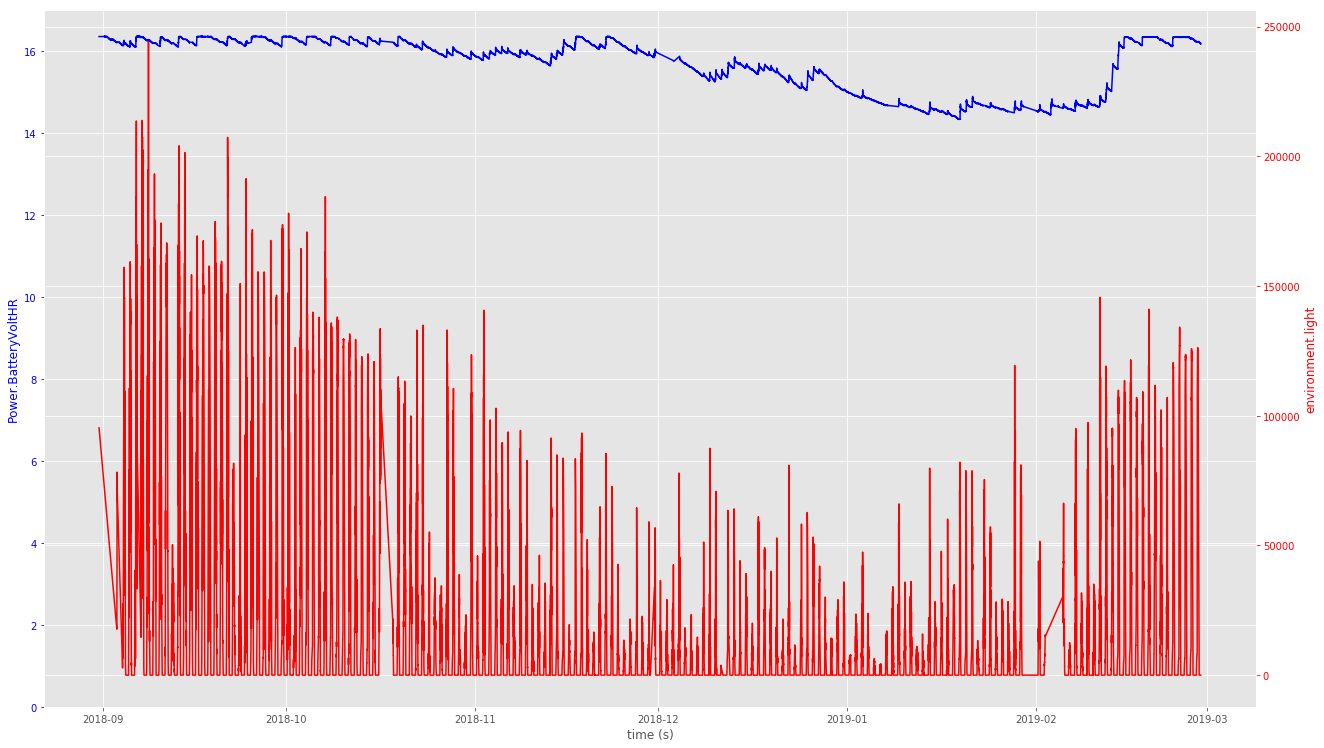

<Figure size 1080x720 with 0 Axes>

In [13]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(15,10))

x1=data.index
y1=data['Power.BatteryVoltHR']
ax1.plot(x1, y1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Power.BatteryVoltHR', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim([0,17])

ax2 = ax1.twinx()
x2=data.index
y2=data['environment.light']
ax2.plot(x2, y2, 'r-')
ax2.set_ylabel('environment.light', color='r')
ax2.tick_params('y', colors='r')


fig.set_size_inches(18.5, 10.5)

fig.tight_layout()
plt.show()

# Machine Learning

https://www.kaggle.com/junkal/selecting-the-best-regression-model

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
# Check for missing or null values in the data set
print(data.isnull().any())

Power.BatteryState              False
Power.BatteryVoltHR             False
Power.PercentageRemaining       False
Power.TimeRemaining             False
environment.light               False
environment.temperature         False
weather.uv                      False
environment.relativehumidity    False
weather.pressure                False
weather.rainrate                False
weather.windspeed               False
dtype: bool


In [13]:
print(data.dtypes)

Power.BatteryState              float64
Power.BatteryVoltHR             float64
Power.PercentageRemaining       float64
Power.TimeRemaining             float64
environment.light               float64
environment.temperature         float64
weather.uv                      float64
environment.relativehumidity    float64
weather.pressure                float64
weather.rainrate                float64
weather.windspeed               float64
dtype: object


In [14]:
data.describe()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining,environment.light,environment.temperature,weather.uv,environment.relativehumidity,weather.pressure,weather.rainrate,weather.windspeed
count,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000
mean,0.116245,15.674101,72.047336,41867.599787,15700.906765,10.007017,0.181639,77.423179,1018.257388,0.073620,4.166212
std,0.529109,0.652546,25.040926,14919.815295,31626.514662,5.879209,0.530340,13.709916,24.585081,2.841144,2.999979
min,0.000000,14.330000,21.000000,4.000000,0.000000,-2.777407,0.000000,17.598765,0.000000,0.000000,0.000000
25%,0.000000,15.100000,50.000000,28485.000000,0.000000,5.580227,0.000000,70.000000,1011.541886,0.000000,1.987654
50%,0.000000,15.930000,82.000000,47871.774194,0.000000,9.069877,0.000000,81.000000,1019.627099,0.000000,3.557901
75%,0.000000,16.220000,93.000000,54450.000000,14679.192761,13.801914,0.000000,88.000000,1025.963408,0.000000,5.704568
max,6.000000,16.360000,98.000000,57375.000000,244246.234286,27.401605,4.204667,96.000000,1041.568148,640.696296,23.871173


## Picking out the relevant attributes for regression modelling

In [15]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(12, 'Power.BatteryVoltHR').index
columns

Index(['Power.BatteryVoltHR', 'Power.PercentageRemaining',
       'Power.TimeRemaining', 'environment.temperature', 'weather.uv',
       'environment.light', 'weather.pressure', 'Power.BatteryState',
       'weather.rainrate', 'weather.windspeed',
       'environment.relativehumidity'],
      dtype='object')

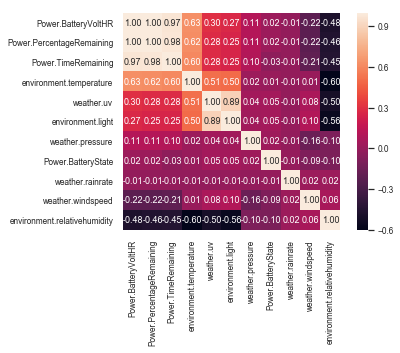

In [17]:
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=0.75)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

## Baseline algorithm test

In [20]:
Y = data['Power.BatteryVoltHR'].values
X = data.drop(columns=['Power.BatteryVoltHR', 'Power.BatteryState', 'Power.PercentageRemaining', 'Power.TimeRemaining'])

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [23]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.246525 (0.005859)
ScaledLASSO: -0.426421 (0.004305)
ScaledEN: -0.426421 (0.004305)
ScaledKNN: -0.130489 (0.006610)
ScaledCART: -0.198585 (0.007907)
ScaledGBM: -0.193632 (0.007027)


In [26]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_neighbors=np.array([2, 3, 5, 10, 25, 50, 100]))
model = KNeighborsRegressor()
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("KNN - Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.148112 (0.006917) with: {'n_neighbors': 2}
-0.136908 (0.005949) with: {'n_neighbors': 3}
-0.130472 (0.006576) with: {'n_neighbors': 5}
-0.130855 (0.006023) with: {'n_neighbors': 10}
-0.146335 (0.005694) with: {'n_neighbors': 25}
-0.160855 (0.006379) with: {'n_neighbors': 50}
-0.172349 (0.006788) with: {'n_neighbors': 100}
KNN - Best: -0.130472 using {'n_neighbors': 5}


In [27]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("GBR - Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.200644 (0.006888) with: {'n_estimators': 50}
-0.193633 (0.007027) with: {'n_estimators': 100}
-0.186663 (0.007081) with: {'n_estimators': 200}
-0.182751 (0.007429) with: {'n_estimators': 300}
-0.180267 (0.007369) with: {'n_estimators': 400}
GBR - Best: -0.180267 using {'n_estimators': 400}


## Finalise and validate model

In [28]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=5)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

0.12830671864137494


In [29]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

,Prediction,Test Data
0,15.099000,15.100
1,14.550000,14.550
2,16.113000,15.895
3,16.344000,16.330
4,15.698585,14.635
5,14.916000,14.600
6,16.254000,16.220
7,15.280538,15.400
8,14.460000,14.460
9,15.489000,16.040


## Test model on time series

In [30]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=5)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X = scaler.transform(X)
predictions = model.predict(rescaled_X)
print (mean_squared_error(Y, predictions))

0.09245419939122951


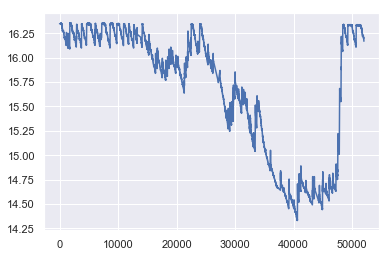

In [31]:
plt.plot(Y)

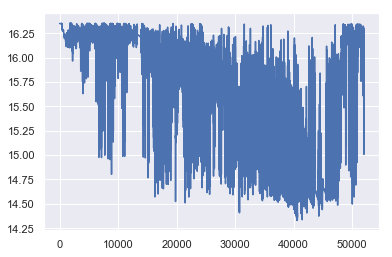

In [32]:
plt.plot(predictions)

# Test model on second normal battery pack

In [33]:
for i in range(0,len(battery_metricsList)):
    print(battery_metricsList[i])
    metricID = battery_metricsList[i]
    df = pd.read_csv('C:/Users/JeffG/Desktop/Case 1 - data/battery_data_3/'+metricID+'_merged.csv',usecols=['time','value'])
    
    if(i==0):
        # Select timestamp and value from results
        data = df[['time','value']]
        # Convert object to float (BatteryVoltHR is an object for example)
        data["value"] = pd.to_numeric(data.value, errors='coerce')
        # Rename the column
        data.rename(columns={'value': metricID}, inplace=True)
        # Calculate average for time bin and replace NaN with interpolation
        data['time'] = pd.to_datetime(data.time, unit='ms')
        data = data.resample(rule='5Min', on='time').mean().interpolate()
        print(len(data))
    else:
        data2 = df[['time','value']]
        # Convert object to float (BatteryVoltHR is an object for example)
        data2["value"] = pd.to_numeric(data2.value, errors='coerce')
        # Rename the column
        data2.rename(columns={'value':metricID}, inplace=True)
        # Calculate average for time bin and replace NaN with interpolation
        data2['time'] = pd.to_datetime(data2.time, unit='ms')
        data2 = data2.resample(rule='5Min', on='time').mean().interpolate()
        data = pd.merge(data, data2, on='time')
        print(len(data))
        
battery_data_2 = data

Power.BatteryState
52011
Power.BatteryVoltHR
52011
Power.PercentageRemaining
52011
Power.TimeRemaining
52011


In [34]:
data2 = pd.merge(battery_data_2, weather_data, on='time')
#data.to_csv(r'C:\Users\JeffG\Desktop\Case 1 - data\all_data.csv')
data2.head()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining,environment.light,environment.temperature,weather.uv,environment.relativehumidity
time,,,,,,,,
2018-08-31 09:45:00,0.0,16.06,87.0,50895.0,95338.168421,17.716316,2.007368,57.000000
2018-08-31 09:50:00,0.0,16.06,87.0,50895.0,95245.765697,17.716189,2.004979,57.019048
2018-08-31 09:55:00,0.0,16.06,87.0,50895.0,95153.362974,17.716063,2.002589,57.038095
2018-08-31 10:00:00,0.0,16.06,87.0,50895.0,95060.960250,17.715936,2.000199,57.057143
2018-08-31 10:05:00,0.0,16.06,87.0,50895.0,94968.557527,17.715810,1.997810,57.076190


In [35]:
Y = data2['Power.BatteryVoltHR'].values
#X = data2.drop(columns='Power.BatteryVoltHR')
X = data2.drop(columns=['Power.BatteryVoltHR', 'Power.BatteryState', 'Power.PercentageRemaining', 'Power.TimeRemaining'])

In [36]:
# transform the validation dataset
rescaled_X = scaler.transform(X)
predictions = model.predict(rescaled_X)
print (mean_squared_error(Y, predictions))

1.8733914507657714


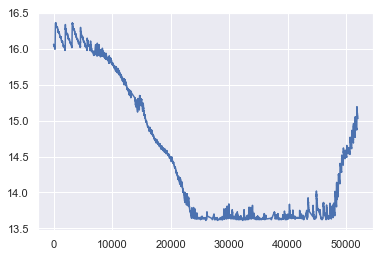

In [37]:
plt.plot(Y)

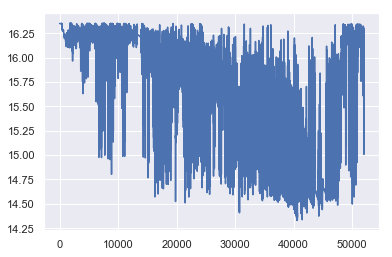

In [38]:
plt.plot(predictions)

It seems that normal regression models will not do the trick to come to a decent accuracy of predicting the battery voltage. We'll need to have a look at how to apply machine learning on time series data.

# VAR
https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [ ]:
data.head()

In [ ]:
# checking stationarity
# For a series to be stationary, the eigenvalues of |Φ(L)-1| should be less than 1 in modulus. 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data,-1,1).eig

In [ ]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [ ]:
prediction

In [ ]:
#converting predictions to dataframe
cols = data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,len(cols)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], valid[i])))

In [ ]:
pred

In [ ]:
plt.plot(valid['Power.BatteryVoltHR'])

In [ ]:
plt.plot(pred['Power.BatteryVoltHR'])

In [ ]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

# Multivariate Time Series Forecasting with LSTMs in Keras

In [2]:
import numpy
print('Numpy: %s' % numpy.__version__)

Numpy: 1.16.2


In [3]:
# theano
import theano
print('theano: %s' % theano.__version__)

theano: 1.0.3


In [ ]:
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)

In [2]:
# keras
import keras
print('keras: %s' % keras.__version__)

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\JeffG\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\JeffG\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\JeffG\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\JeffG\Anaconda3\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\JeffG\Anaconda3\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Kan opgegeven module niet vinden.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.